enter the number of variables: 2
Enter the initial population size: 10
Enter the minimum value of X: -1.28
Enter the maximum value of X: 1.28
Enter the max number of iterations: 100
[1.437238   1.89615995 1.25494232 1.72969521 1.96526807 1.11472953
 1.30126355 0.957095   1.08709999 1.27603256 1.93934173 0.94102371
 1.382032   1.68561672 1.74409425 1.72438204 1.37538521 0.83039691
 0.78833218 1.11426051 0.25768541 0.38738819 1.22388264 0.93823673
 0.94745568 0.9481931  0.54919081 0.48739555 0.59618198 1.11270868
 1.10886503 1.73088238 1.45631187 0.89344449 0.53376295 1.60858766
 1.68329394 0.99407738 1.21530193 1.21089067 1.11309404 0.92286033
 0.64098325 0.74344117 0.51423106 0.58451214 0.85124607 1.76003436
 1.48046131 1.79514402 0.23977836 1.52292614 0.52259095 1.03348601
 0.7222767  0.59332133 0.91168294 1.15306456 1.52027047 0.3489937
 1.52480356 1.3852568  1.37378825 1.32824132 1.00635611 1.31368275
 1.09515111 0.72928781 1.38754143 1.51675043 1.16184673 1.00733581
 0.65294739 0.9

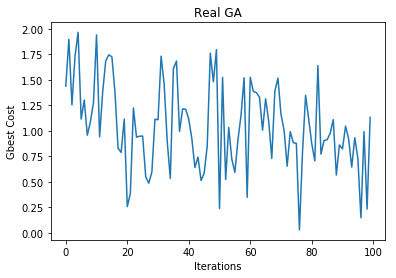

In [2]:
#Generating Initial Population
import numpy as np
import matplotlib.pyplot as plt
v=int(input("enter the number of variables: "))
N=int(input("Enter the initial population size: "))
xmin=float(input("Enter the minimum value of X: "))
xmax=float(input("Enter the maximum value of X: "))
iterations=int(input("Enter the max number of iterations: "))
def POP(v,N,xmin,xmax):
    return ((np.random.rand(N,v))*(2*xmax))-xmax
pop=POP(v,N,xmin,xmax)
#fitness
def fitness(a):
    l=0
    for ind, value in np.ndenumerate(a):
        o=(int(ind[0])+1)*(value**4)+np.random.rand()
        l+=o
    return l
def findfitness(pop):
    return np.apply_along_axis(fitness,1,pop)
bests=np.empty((iterations,v))
for iteration in range(0,iterations):
        fit=findfitness(pop)
        #Tournament Selection
        parent=np.empty((N,v))
        for s in range(0,N):
            r1=np.random.randint(0,N)
            r2=r1
            while r2==r1:
                r2=np.random.randint(0,N)
            if fit[r1]<fit[r2]:
                parent[s]=pop[r1]
            else:
                parent[s]=pop[r2]
        #crossover
        Pc=0.8
        Uc=20
        child=np.empty((int((Pc*N)),v))
        for c in range(0,int(Pc*N),2):
            for f in range(0,v):
                r=np.random.rand()
                if r<=0.5:
                    b=(2*r)**(1/(1+Uc))
                else:
                    b=1/((2*(1-r))**(1/(1+Uc)))
                child[c,f]= ((1+b)*parent[c,f]+(1-b)*parent[c+1,f])/2
                child[c+1,f] =((1-b)*parent[c,f]+(1+b)*parent[c+1,f])/2
        #Mutation
        mpop=np.concatenate((pop, child), axis=0)
        Pm=0.2
        Um=20
        for i in range(0,int(Pm*mpop.shape[0])):
            r3=np.random.randint(0,mpop.shape[0])
            for m in range(0,v):
                r4=np.random.rand()
                if r4<=0.5:
                    d=((2*r4)**(1/(1+Um)))-1
                else:
                    d=1-((2*(1-r4))**(1/(1+Um)))
                mpop[r3,m]+=d
        fitness_b=findfitness(mpop)
        sortindex=np.argsort(fitness_b,axis=0)
        mpop=mpop[sortindex,:].reshape(int(N+(Pc*N)),v)
        newgen=mpop[0:N,:]
        fitness_a=findfitness(newgen)
        bests[iteration]=newgen[0]        
        pop=newgen
bestcost=findfitness(bests)
print(bestcost)
plt.plot(bestcost)
plt.xlabel('Iterations')
plt.ylabel('Gbest Cost')
plt.title('Real GA')
plt.show()